In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Binarizer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('cancer_data.csv')

In [3]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
y=data.pop("diagnosis")
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [5]:
data.dtypes[data.dtypes!="object"].index

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
num_var=list(data.dtypes[data.dtypes!="object"].index)
num_var.remove('id')
X=data[num_var]

In [7]:
y=Y

NameError: name 'Y' is not defined

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=100,test_size=0.2)

In [9]:
data.describe(include='all')

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


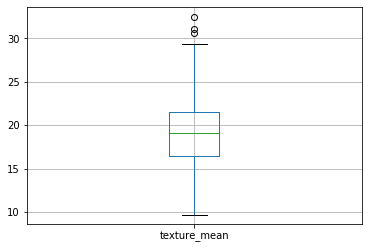

In [10]:
X_test.boxplot(column=['texture_mean'],grid=True)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [12]:
model=RandomForestClassifier(1000,oob_score=True)
model.fit(scaled_X_train,Y_train)
model.oob_score_

0.9582417582417583

In [13]:
model.feature_importances_

array([0.03666695, 0.0155722 , 0.04823869, 0.04200569, 0.00666635,
       0.01006933, 0.04101056, 0.11774522, 0.00449023, 0.00345167,
       0.01836394, 0.00475477, 0.01448963, 0.03886695, 0.00318838,
       0.00444624, 0.00631635, 0.00477175, 0.00358431, 0.00403962,
       0.10634227, 0.02180691, 0.11865544, 0.10074033, 0.01444713,
       0.01545713, 0.0384526 , 0.13941947, 0.00877949, 0.0071604 ])

In [14]:
s=pd.Series(model.feature_importances_, index=X_train.columns)


In [33]:
r=s.get(s.values>0.02)
#Taking values greater than 2 percent
r

radius_mean             0.036667
perimeter_mean          0.048239
area_mean               0.042006
concavity_mean          0.041011
concave points_mean     0.117745
area_se                 0.038867
radius_worst            0.106342
texture_worst           0.021807
perimeter_worst         0.118655
area_worst              0.100740
concavity_worst         0.038453
concave points_worst    0.139419
dtype: float64

In [16]:
r=pd.Series(s.get(s.values>0.02),index=s.keys())

In [17]:
r

radius_mean                0.036667
texture_mean                    NaN
perimeter_mean             0.048239
area_mean                  0.042006
smoothness_mean                 NaN
compactness_mean                NaN
concavity_mean             0.041011
concave points_mean        0.117745
symmetry_mean                   NaN
fractal_dimension_mean          NaN
radius_se                       NaN
texture_se                      NaN
perimeter_se                    NaN
area_se                    0.038867
smoothness_se                   NaN
compactness_se                  NaN
concavity_se                    NaN
concave points_se               NaN
symmetry_se                     NaN
fractal_dimension_se            NaN
radius_worst               0.106342
texture_worst              0.021807
perimeter_worst            0.118655
area_worst                 0.100740
smoothness_worst                NaN
compactness_worst               NaN
concavity_worst            0.038453
concave points_worst       0

In [18]:
X=data[['radius_mean','perimeter_mean','area_mean','concavity_mean','concave points_mean','area_se','radius_worst','texture_worst','perimeter_worst','area_worst','concavity_worst','concave points_worst']]

In [19]:
data.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=100)
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [22]:
model=RandomForestClassifier(1000,oob_score=True)
model.fit(scaled_X_train,Y_train)
model.oob_score_

0.9560439560439561

In [23]:
%%timeit
model=RandomForestClassifier(1000,n_jobs=1,oob_score=True)
model.fit(scaled_X_train,Y_train)
#model.oob_score_

809 ms ± 63.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%%timeit
model=RandomForestClassifier(1000,n_jobs=-1,oob_score=True)
model.fit(scaled_X_train,Y_train)
#model.oob_score_

736 ms ± 3.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
n_trees=[30,50,100,150,200,1000,2000,3000]
for trees in n_trees:
    model=RandomForestClassifier(n_estimators=trees,n_jobs=-1,oob_score=True)
    model.fit(scaled_X_train,Y_train)
    print(trees,' trees')
    OOB=model.oob_score_
    print('OOB Score: ',OOB)

30  trees
OOB Score:  0.9538461538461539
50  trees
OOB Score:  0.9516483516483516
100  trees
OOB Score:  0.9538461538461539
150  trees
OOB Score:  0.9494505494505494
200  trees
OOB Score:  0.9582417582417583
1000  trees
OOB Score:  0.9626373626373627
2000  trees
OOB Score:  0.9582417582417583
3000  trees
OOB Score:  0.9604395604395605


In [26]:
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2,1]

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=200, oob_score=True, n_jobs=-1,max_features=max_features)
    model.fit(scaled_X_train,Y_train)
    print(max_features, "No_Of_features")
    OOB = model.oob_score_
    print('OOB: ', OOB)

auto No_Of_features
OOB:  0.9626373626373627
None No_Of_features
OOB:  0.9516483516483516
sqrt No_Of_features
OOB:  0.9560439560439561
log2 No_Of_features
OOB:  0.9604395604395605
0.9 No_Of_features
OOB:  0.9538461538461539
0.2 No_Of_features
OOB:  0.9626373626373627
1 No_Of_features
OOB:  0.9582417582417583


In [27]:
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=200, oob_score=True, n_jobs=-1,max_features="auto", min_samples_leaf=min_samples)
    #model.fit(X, y)
    model.fit(scaled_X_train, Y_train)
    print(min_samples, "min samples")
    OOB = model.oob_score_
    print('OOB: ', OOB)

1 min samples
OOB:  0.9538461538461539
2 min samples
OOB:  0.9516483516483516
3 min samples
OOB:  0.9604395604395605
4 min samples
OOB:  0.9582417582417583
5 min samples
OOB:  0.9582417582417583
6 min samples
OOB:  0.9560439560439561
7 min samples
OOB:  0.945054945054945
8 min samples
OOB:  0.9472527472527472
9 min samples
OOB:  0.9494505494505494
10 min samples
OOB:  0.9406593406593406


In [44]:
model = RandomForestClassifier(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1,  
                              max_features="auto", 
                              min_samples_leaf=5)
model.fit(scaled_X_train,Y_train)
model.oob_score_

0.9560439560439561

In [45]:
Y_pred=model.predict(scaled_X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
confusion_matrix(Y_test,Y_pred)

array([[63,  2],
       [ 1, 48]], dtype=int64)

In [47]:
g=accuracy_score(Y_test,Y_pred)
h=recall_score(Y_test,Y_pred)
i=precision_score(Y_test,Y_pred)
o=f1_score(Y_test,Y_pred)

print(g)
print(h)
print(i)
print(o)

0.9736842105263158
0.9795918367346939
0.96
0.9696969696969697


In [42]:
from sklearn.metrics import classification_report
target_names=['Cancer','Non-Cancer']
print(classification_report(Y_test,Y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Cancer       0.98      0.97      0.98        65
  Non-Cancer       0.96      0.98      0.97        49

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

